![Logo 1](https://git.wmi.amu.edu.pl/AITech/Szablon/raw/branch/master/Logotyp_AITech1.jpg)
<div class="alert alert-block alert-info">
<h1> Modelowanie języka</h1>
<h2> 03. <i>N-gramy</i>  [wykład]</h2> 
<h3> Filip Graliński (2022)</h3>
</div>

![Logo 2](https://git.wmi.amu.edu.pl/AITech/Szablon/raw/branch/master/Logotyp_AITech2.jpg)



## N-gramy



W modelowaniu języka często rozpatruje się n-gramy, czyli podciągi o
rozmiarze $n$.

Na przykład *digramy* (*bigramy*) to zbitki dwóch jednostek, np. liter albo wyrazów.

| $n$|$n$-gram|nazwa|
|---|---|---|
| 1|1-gram|unigram|
| 2|2-gram|digram/bigram|
| 3|3-gram|trigram|
| 4|4-gram|tetragram|
| 5|5-gram|pentagram|

**Pytanie:** Jak nazywa się 6-gram?

Jak widać, dla symetrii mówimy czasami o unigramach, jeśli operujemy
po prostu na jednostkach, nie na ich podciągach.



#### N-gramy z Pana Tadeusza



Statystyki, które policzyliśmy dla pojedynczych liter czy wyrazów, możemy powtórzyć dla n-gramów.



In [1]:
def ngrams(iter, size):
  ngram = []
  for item in iter:
     ngram.append(item)
     if len(ngram) == size:
        yield tuple(ngram)
        ngram = ngram[1:]

list(ngrams("kotek", 3))

[('k', 'o', 't'), ('o', 't', 'e'), ('t', 'e', 'k')]

Zauważmy, że policzyliśmy wszystkie n-gramy, również częściowo się pokrywające.

Zawsze powinniśmy się upewnić, czy jest jasne, czy chodzi o n-gramy znakowe czy wyrazowe



#### 3-gramy znakowe



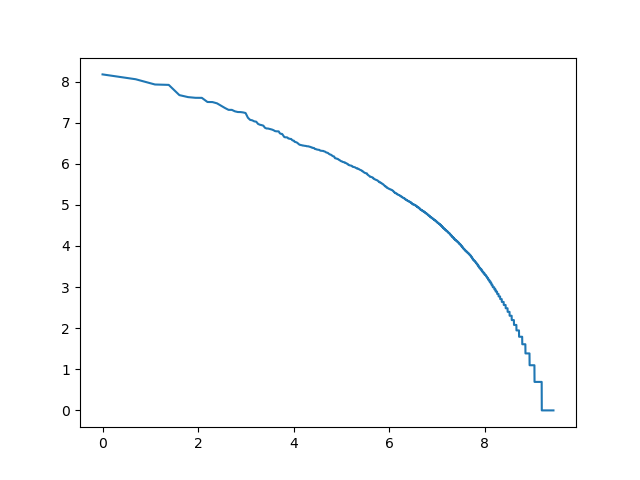

In [1]:
log_rang_log_freq('pt-3-char-ngrams-log-log', ngrams(get_characters(pan_tadeusz), 3))

#### 2-gramy wyrazowe



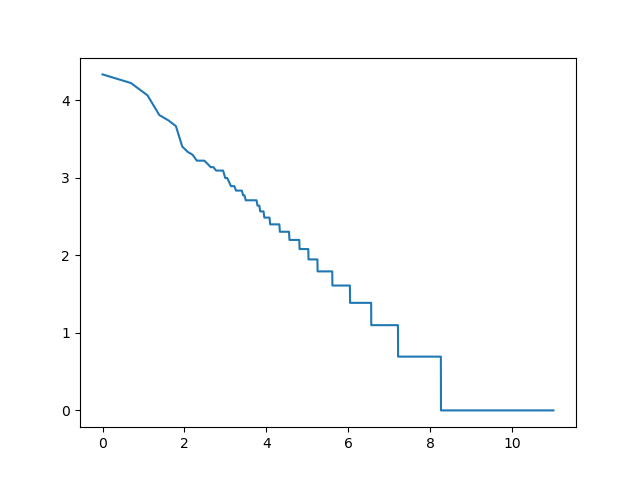

In [1]:
log_rang_log_freq('pt-2-word-ngrams-log-log', ngrams(get_words(pan_tadeusz), 2))

### Tajemniczy język Manuskryptu Wojnicza



[Manuskrypt Wojnicza](https://pl.wikipedia.org/wiki/Manuskrypt_Wojnicza) to powstały w XV w. manuskrypt spisany w
tajemniczym alfabecie, do dzisiaj nieodszyfrowanym. Rękopis stanowi
jedną z największych zagadek historii (i lingwistyki).

[Źródło: https://commons.wikimedia.org/wiki/File:Voynich<sub>Manuscript</sub><sub>(135)</sub>.jpg](./02_Jezyki/voynich135.jpg)

Sami zbadajmy statystyczne własności tekstu manuskryptu. Użyjmy
transkrypcji Vnow, gdzie poszczególne znaki tajemniczego alfabetu
zamienione na litery alfabetu łacińskiego, cyfry i gwiazdkę. Jak
transkrybować manuskrypt, pozostaje sprawą dyskusyjną, natomiast wybór
takiego czy innego systemu transkrypcji nie powinien wpływać
dramatycznie na analizę statystyczną.



In [1]:
import requests

voynich_url = 'http://www.voynich.net/reeds/gillogly/voynich.now'
voynich = requests.get(voynich_url).content.decode('utf-8')

voynich = re.sub(r'\{[^\}]+\}|^<[^>]+>|[-# ]+', '', voynich, flags=re.MULTILINE)

voynich = voynich.replace('\n\n', '#')
voynich = voynich.replace('\n', ' ')
voynich = voynich.replace('#', '\n')

voynich = voynich.replace('.', ' ')

voynich[100:150]

9 OR 9FAM ZO8 QOAR9 Q*R 8ARAM 29 [O82*]OM OPCC9 OP

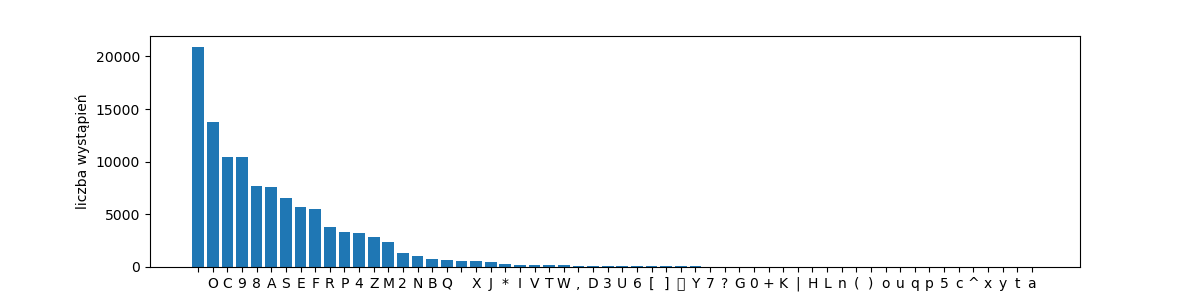

In [1]:
rang_freq_with_labels('voy-chars', get_characters(voynich))

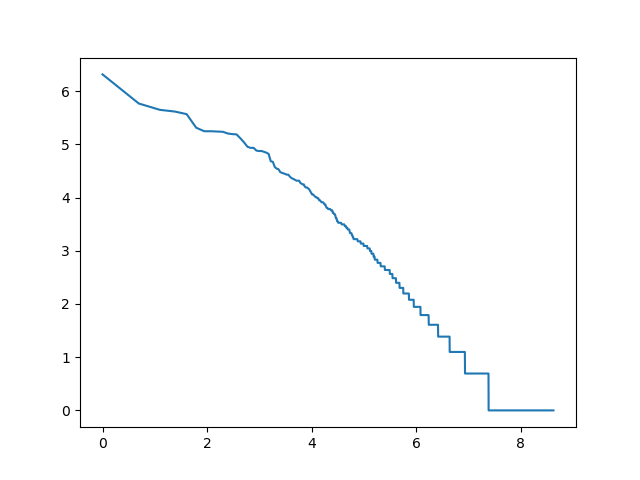

In [1]:
log_rang_log_freq('voy-log-log', get_words(voynich))

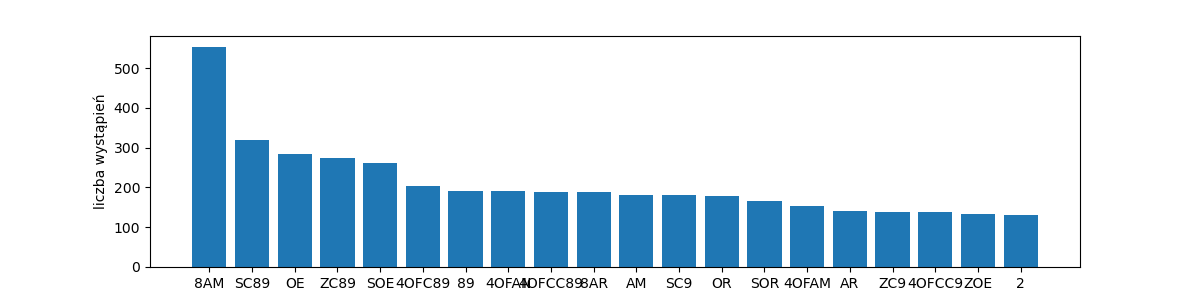

In [1]:
rang_freq_with_labels('voy-words-20', get_words(voynich), top=20)

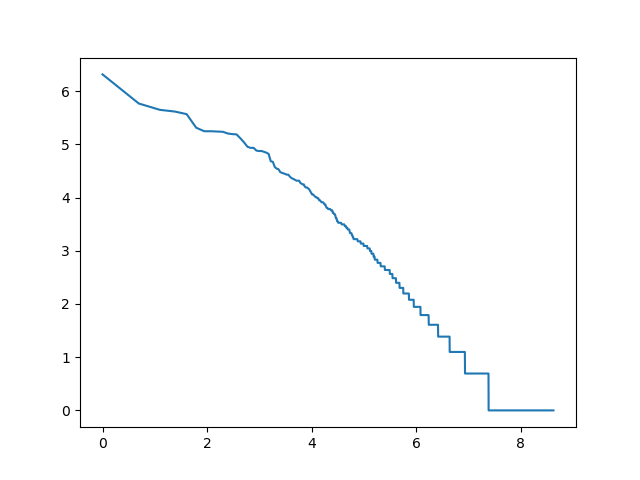

In [1]:
log_rang_log_freq('voy-words-log-log', get_words(voynich))

### Język DNA



Kod genetyczny przejawia własności zaskakująco podobne do języków naturalnych.
Przede wszystkim ma charakter dyskretny, genotyp to ciąg symboli ze skończonego alfabetu.
Podstawowe litery są tylko cztery, reprezentują one nukleotydy, z których zbudowana jest nić DNA:
a, g, c, t.



In [1]:
import requests

dna_url = 'https://raw.githubusercontent.com/egreen18/NanO_GEM/master/rawGenome.txt'
dna = requests.get(dna_url).content.decode('utf-8')

dna = ''.join(dna.split('\n')[1:])
dna = dna.replace('N', 'A')

dna[0:100]

TATAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTA

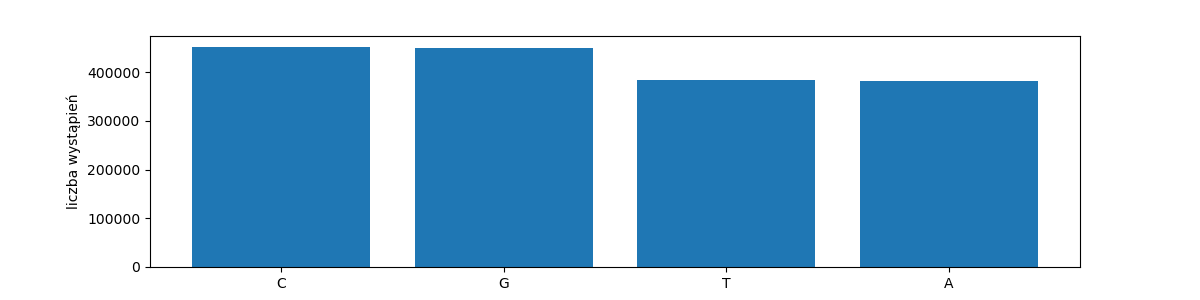

In [1]:
rang_freq_with_labels('dna-chars', get_characters(dna))

#### Tryplety — znaczące cząstki genotypu



Nukleotydy rzeczywiście są jak litery, same w sobie nie niosą
znaczenia. Dopiero ciągi trzech nukleotydów, *tryplety*, kodują jeden
z dwudziestu aminokwasów.



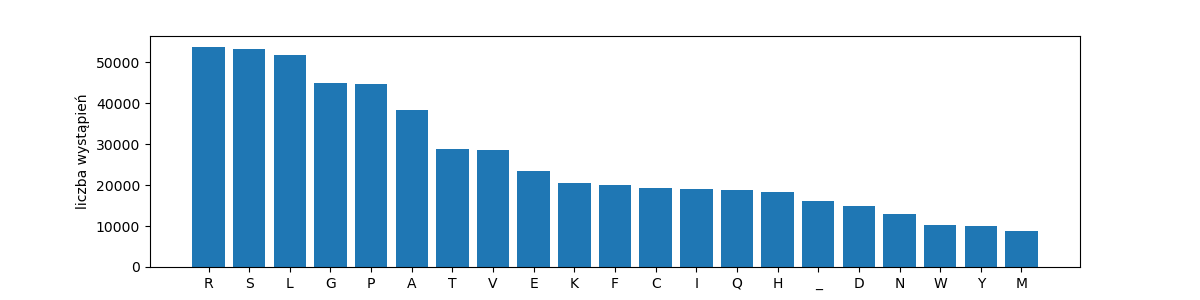

In [1]:
genetic_code = {
     'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
     'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
     'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
     'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
     'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
     'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
     'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
     'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
     'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
     'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
     'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
     'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
     'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
     'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
     'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
     'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
  }

def get_triplets(t):
  for triplet in re.finditer(r'.{3}', t):
    yield genetic_code[triplet.group(0)]

rang_freq_with_labels('dna-aminos', get_triplets(dna))

#### „Zdania” w języku DNA



Z aminokwasów zakodowanych przez tryplet budowane są białka.
Maszyneria budująca białka czyta sekwencję aż do napotkania
trypletu STOP (\_ powyżej). Taka sekwencja to *gen*.



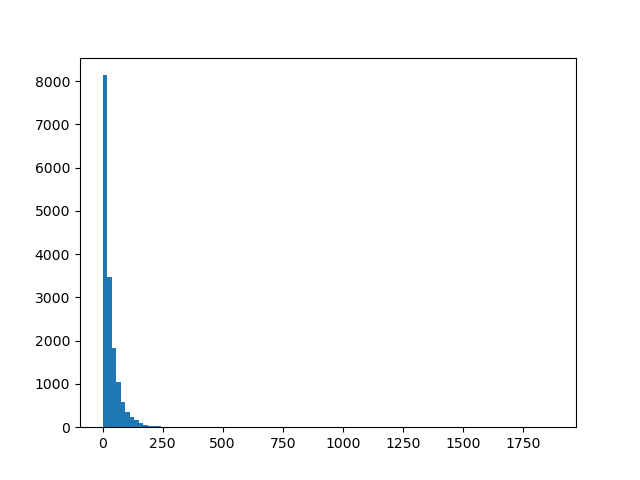

In [1]:
def get_genes(triplets):
  gene = []
  for ammino in triplets:
    if ammino == '_':
       yield gene
       gene = []
    else:
       gene.append(ammino)

plt.figure().clear()
plt.hist([len(g) for g in get_genes(get_triplets(dna))], bins=100)

fname = '03_Ngramy/dna_length.png'

plt.savefig(fname)

fname